# 5.2 - AB Testing Bayesiano


### Conjugado a priori

https://en.wikipedia.org/wiki/Conjugate_prior

https://en.wikipedia.org/wiki/Beta_distribution

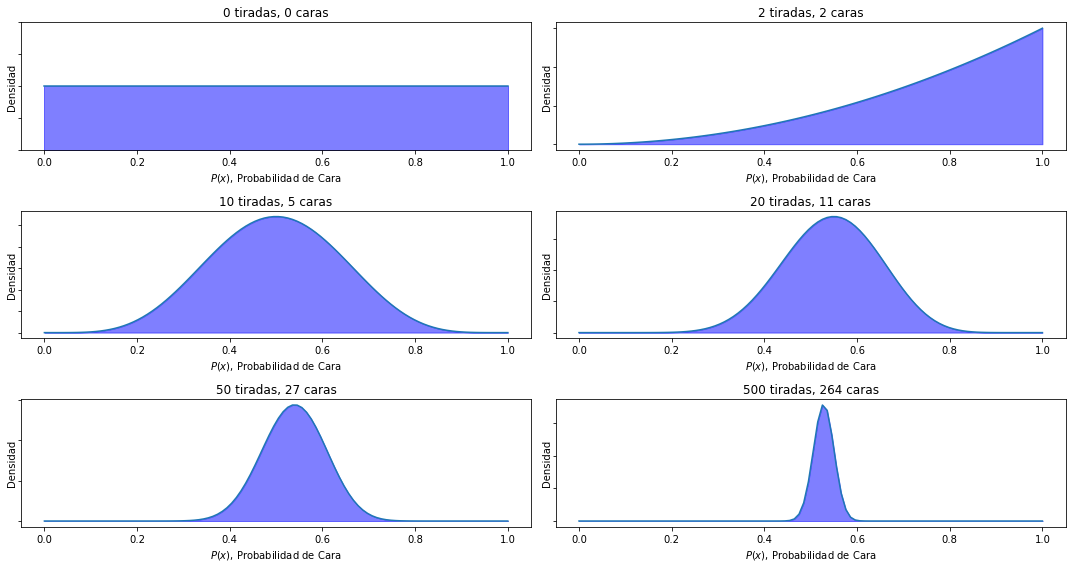

In [1]:
# tiros_de_moneda.py  (modelo beta-binomial)

import warnings
warnings.simplefilter('ignore')


import numpy as np
import pylab as plt
plt.rcParams['figure.figsize']=(15, 8)

from scipy.stats import bernoulli, beta               


tiradas=[0,2,10,20,50,500]    # lista del numero de intentos (experimentos de Bernoulli)
  
datos=bernoulli.rvs(0.5,size=tiradas[-1])   # se tiran 500 veces la moneda, 0-cruz, 1-cara (B(p,n))

x=np.linspace(0,1,100)  # espaciado lineal entre 0 y 1, 100 puntos, se discretiza el eje x


for i,N in enumerate(tiradas):  # se actualiza la informacion respecto al nº de tiradas, modelo beta-binomial (i actualizaciones , N tiradas)

    caras=datos[:N].sum()                              # suma las caras que van saliendo
    ax=plt.subplot(len(tiradas)/2, 2, i+1)             # se crea un plot cada vez que se actualiza
    
    ax.set_title("%s tiradas, %s caras" % (N, caras))  # titulo  
    plt.xlabel("$P(x)$, Probabilidad de Cara")         # etiqueta x
    plt.ylabel("Densidad")                             # etiqueta y
    
    if i == 0:                                         # limite del eje y en el primer plot (0 tiradas)
        plt.ylim([0.0, 2.0])
    plt.setp(ax.get_yticklabels(), visible=False)      # quita los numeros del eje y
    
    y=beta.pdf(x, 1+caras, 1+N-caras)                  # se crea y se dibuja la distribucion beta que representa... (Beta(x,a,b))
    plt.plot(x,y)                                      # ... la creencia a posteriori de la perfeccion de la moneda (beta-binomial, bayesiano)
    plt.fill_between(x, 0, y, color='b', alpha=0.5)    # se rellena de color la distribucion 


plt.tight_layout()  # se expande el plot
plt.show();         # se plotea

In [2]:
# los datos son conocidos : impresiones y conversiones para test y control

imps_ctrl, convs_ctrl = 16500, 30   # entrar, comprar
imps_test, convs_test= 17000, 50


CR_ctrl = convs_ctrl/imps_ctrl
CR_test = convs_test/imps_test

f'TASAS: Control={CR_ctrl}, Test={CR_test}'

'TASAS: Control=0.0018181818181818182, Test=0.0029411764705882353'

In [3]:
# a prioris, las betas

a_C, b_C = convs_ctrl+1, imps_ctrl-convs_ctrl+1
a_T, b_T = convs_test+1, imps_test-convs_test+1

beta_control=beta(a_C, b_C)
beta_test=beta(a_T, b_T)

In [4]:
beta_control.mean(), beta_test.mean()

(0.0018785601745243, 0.0029996471003411363)

In [5]:
x=np.linspace(0, 0.008, 1000)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();

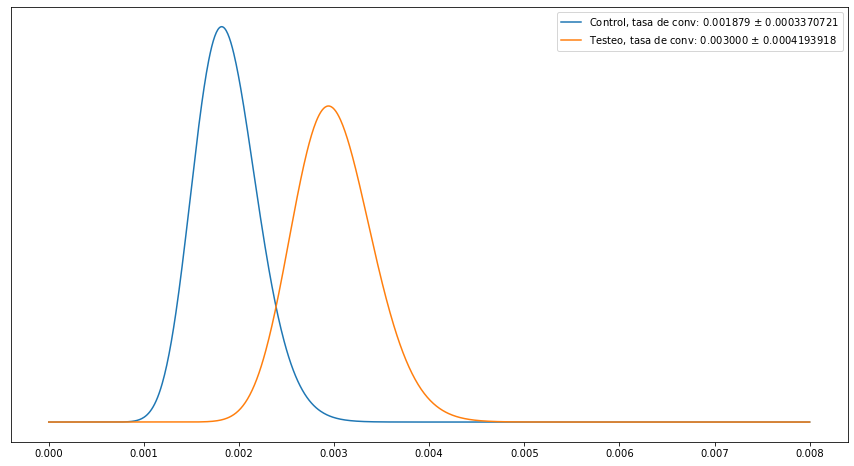

In [6]:
plot([beta_control, beta_test], ['Control', 'Testeo'])

![bayesian_ab_test](images/bayesian_ab_test.gif)

In [7]:
salto=(beta_test.mean() - beta_control.mean())/beta_control.mean()

salto

0.5967798854783688

In [8]:
!pip install mpmath

In [9]:
from mpmath import betainc   # integral de beta

prob=betainc(a_T, b_T, 0.0022, 1, regularized=True)

prob=float(prob)

prob

0.9803160317657994

In [10]:
'''El test aumenta la tasa de conversion en un {:2.2f}%, con una probabilidad del {:2.2f}%'''.format(salto*100, prob*100)

'El test aumenta la tasa de conversion en un 59.68%, con una probabilidad del 98.03%'

### what if...? 

¿cual es la prob de que el test sea superior a 0.003 (CR)?

In [11]:
prob=betainc(a_T, b_T, 0.003, 1, regularized=True)

prob=float(prob)

prob

0.48112566853812544

¿cual es la prob de fracasar si me cambio al test?

In [12]:
prob=betainc(a_T, b_T, 0, 0.0022, regularized=True)

prob=float(prob)

prob

0.019683968234200593